<a href="https://colab.research.google.com/github/ActiveStacks/DatasetOne/blob/main/Final1_EXPERIMENT_CODEBERTLLM_1E8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix
import torch
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
    # QARK: Quick Android Review Kit (Vulnerability Scanner)
    # QARK SCANNED DATASET
# path1 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_Qark_Processed.csv')
# path2 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_Qark_Processed.csv')
# path3 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_Qark_Processed.csv')


    # MOBSF: Mobile Security Framework (Vulnerability Scanner)
    # MOBSF SCANNED DATASET
# path4 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_MobSF_Processed.csv')
# path5 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_MobSF_Processed.csv')
# path6 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_MobSF_Processed.csv')

    # COMBINED DATASET
# path7 = ('/content/drive/MyDrive/Dataset1/LVDAndro_SourceFiles_Combined_Processed.csv')
path8 = ('/content/drive/MyDrive/Dataset1/LVDAndro_APKs_Combined_Processed.csv')
#path9 = ('/content/drive/MyDrive/Dataset1/LVDAndro_All_Combined_Processed.csv')

In [ ]:
df = pd.read_csv(path8)

<ipython-input-4-cef7133f957d>:1: DtypeWarning: Columns (1,2,3,5,6,10,11,12,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path8)


In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
df.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,0,NaN,NaN,NaN,package a.t.a.a;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package a.t.a.a;,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,import a.h.b.e;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.h.b.e;,NaN,NaN,NaN
3,3,NaN,NaN,NaN,import a.h.c.a.h;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.h.c.a.h;,NaN,NaN,NaN
4,4,NaN,NaN,NaN,import a.t.a.a.g;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.t.a.a.g;,NaN,NaN,NaN


In [ ]:
df.dropna()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name


In [ ]:
df.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,0,NaN,NaN,NaN,package a.t.a.a;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package a.t.a.a;,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,import a.h.b.e;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.h.b.e;,NaN,NaN,NaN
3,3,NaN,NaN,NaN,import a.h.c.a.h;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.h.c.a.h;,NaN,NaN,NaN
4,4,NaN,NaN,NaN,import a.t.a.a.g;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.t.a.a.g;,NaN,NaN,NaN


In [ ]:
df.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
4490937,4680272,NaN,NaN,NaN,this.zzq = bl;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,this.zzq = bl;,NaN,NaN,NaN
4490938,4680273,NaN,NaN,NaN,this.zzr = string2;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,this.zzr = string2;,NaN,NaN,NaN
4490939,4680274,NaN,NaN,NaN,this.zzs = zze2;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,this.zzs = zze2;,NaN,NaN,NaN
4490940,4680275,NaN,NaN,NaN,private CellResolution parseCellResolution(Xml...,NaN,NaN,NaN,CWE-312,Cleartext Storage of Sensitive Information,NaN,NaN,NaN,1,private CellResolution parseCellResolution(Xml...,file,INFO,Hardcoded HTTP url found
4490941,4680276,NaN,NaN,NaN,"Log.i(DcHelper.TAG, ""opening of external activ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"Log.i(DcHelper.TAG, ""user_str"", (Throwable)ex);",NaN,NaN,NaN


In [ ]:
df.shape

(4490942, 18)

In [ ]:
df.describe()

,index,CVSS,Vulnerability_status
count,4.490942e+06,28221.000000,4.490942e+06
mean,2.301414e+06,6.993714,1.110079e-02
std,1.356250e+06,1.352684,1.047739e-01
min,0.000000e+00,0.000000,0.000000e+00
25%,1.122735e+06,7.500000,0.000000e+00
50%,2.270972e+06,7.500000,0.000000e+00
75%,3.479106e+06,7.500000,0.000000e+00
max,4.680276e+06,8.800000,1.000000e+00


In [ ]:
df.columns

Index(['index', 'Description', 'Type', 'Pattern', 'Code', 'Severity',
       'Input Case', 'CVSS', 'CWE_ID', 'CWE_Desc', 'OWASP_Mobile',
       'OWSAP_MASVS', 'Reference', 'Vulnerability_status', 'processed_code',
       'category', 'severity', 'qark_name'],
      dtype='object')

In [ ]:
df.nunique()

,0
index,4490942
Description,24
Type,4
Pattern,24
Code,4466913
Severity,4
Input Case,2
CVSS,9
CWE_ID,22
CWE_Desc,23


In [ ]:
df['Vulnerability_status'].unique()

array([0, 1])

In [ ]:
print(df['Vulnerability_status'].value_counts())

Vulnerability_status
0    4441089
1      49853
Name: count, dtype: int64


In [ ]:
df_safe = df[df['Vulnerability_status']==0]

In [ ]:
df_vulnerable = df[df['Vulnerability_status']==1]

In [ ]:
df_safe.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,0,NaN,NaN,NaN,package a.t.a.a;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,package a.t.a.a;,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,import a.h.b.e;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.h.b.e;,NaN,NaN,NaN
3,3,NaN,NaN,NaN,import a.h.c.a.h;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.h.c.a.h;,NaN,NaN,NaN
4,4,NaN,NaN,NaN,import a.t.a.a.g;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,import a.t.a.a.g;,NaN,NaN,NaN


In [ ]:
df_safe.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
4490936,4680271,NaN,NaN,NaN,"zzd(boolean bl, String string2, zze zze2) {",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"zzd(boolean bl, String string2, zze zze2) {",NaN,NaN,NaN
4490937,4680272,NaN,NaN,NaN,this.zzq = bl;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,this.zzq = bl;,NaN,NaN,NaN
4490938,4680273,NaN,NaN,NaN,this.zzr = string2;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,this.zzr = string2;,NaN,NaN,NaN
4490939,4680274,NaN,NaN,NaN,this.zzs = zze2;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,this.zzs = zze2;,NaN,NaN,NaN
4490941,4680276,NaN,NaN,NaN,"Log.i(DcHelper.TAG, ""opening of external activ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"Log.i(DcHelper.TAG, ""user_str"", (Throwable)ex);",NaN,NaN,NaN


In [ ]:
df_vulnerable.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
175,175,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.e(""VectorDrawableCompat"", ""parser error"", ...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(""user_str"", ""user_str"", e4);",NaN,NaN,NaN
567,567,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.w(y, ""Compatibility shadow requested but c...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.w(y, ""user_str"");",NaN,NaN,NaN
1220,1220,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.e(""CSLCompat"", ""Failed to inflate ColorSta...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(""user_str"", ""user_str"", e2);",NaN,NaN,NaN
1473,1473,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.v(""FragmentManager"", g.toString());",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.v(""user_str"", g.toString());",NaN,NaN,NaN
1550,1550,The App logs information. Sensitive informatio...,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,"Log.e(""TypefaceCompatApi21Impl"", e2.getClass()...",info,exact,7.5,CWE-532,Insertion of Sensitive Information into Log File,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.e(""user_str"", e2.getClass().getName(), e2);",NaN,NaN,NaN


In [ ]:
df_vulnerable.tail()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
4490135,4679467,NaN,NaN,NaN,"Log.w(NotificationCenter.TAG, (Throwable)o);",NaN,NaN,NaN,CWE-532,Insertion of Sensitive Information into Log File,NaN,NaN,NaN,1,"Log.w(NotificationCenter.TAG, (Throwable)o);",file,WARNING,Logging found
4490635,4679969,NaN,NaN,NaN,"Log.d((String)string2, (String)this.zzh(string...",NaN,NaN,NaN,CWE-532,Insertion of Sensitive Information into Log File,NaN,NaN,NaN,1,"Log.d((String)string2, (String)this.zzh(string...",file,WARNING,Logging found
4490900,4680235,NaN,NaN,NaN,"Log.w(""GoogleApiAvailability"", concat2);",NaN,NaN,NaN,CWE-532,Insertion of Sensitive Information into Log File,NaN,NaN,NaN,1,"Log.w(""user_str"", concat2);",file,WARNING,Logging found
4490934,4680269,NaN,NaN,NaN,public static <TResult> Task<TResult> call(fin...,NaN,NaN,NaN,CWE-676,Use of Potentially Dangerous Function,NaN,NaN,NaN,1,public static <TResult> Task<TResult> call(fin...,file,WARNING,Insecure functions found
4490940,4680275,NaN,NaN,NaN,private CellResolution parseCellResolution(Xml...,NaN,NaN,NaN,CWE-312,Cleartext Storage of Sensitive Information,NaN,NaN,NaN,1,private CellResolution parseCellResolution(Xml...,file,INFO,Hardcoded HTTP url found


In [ ]:
# DATA IMBALANCE CORRECTION VIA RANDOM UNDERSAMPLING OF MAJORITY DATA

In [ ]:
df_safe_sampled = df_safe.sample(len(df_vulnerable), random_state = 42)

In [ ]:
df_balanced = pd.concat([df_safe_sampled, df_vulnerable])

In [ ]:
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

In [ ]:
print(df_balanced['Vulnerability_status'].value_counts())

Vulnerability_status
0    49853
1    49853
Name: count, dtype: int64


In [ ]:
print(df_balanced.value_counts())

Series([], Name: count, dtype: int64)


<Axes: >

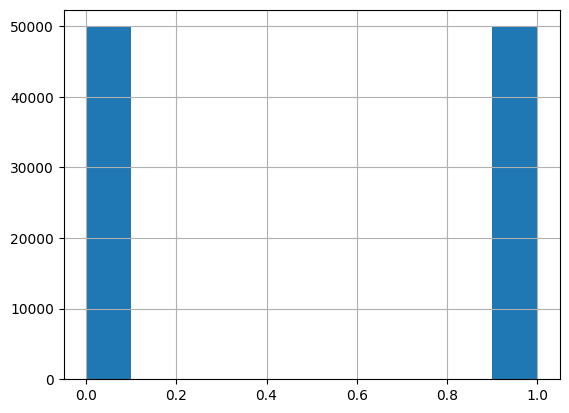

In [ ]:
df_balanced['Vulnerability_status'].hist()

In [ ]:
df_balanced.head()

,index,Description,Type,Pattern,Code,Severity,Input Case,CVSS,CWE_ID,CWE_Desc,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,3355620,NaN,NaN,NaN,n3 = this.mDP * 4.0 + n2;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,n3 = this.mDP * 4.0 + n2;,NaN,NaN,NaN
1,3335922,NaN,NaN,NaN,"Log.e(""AFWall"", ex.getMessage(), (Exception)ex);",NaN,NaN,NaN,CWE-532,Insertion of Sensitive Information into Log File,NaN,NaN,NaN,1,"Log.e(""user_str"", ex.getMessage(), (Exception)...",file,WARNING,Logging found
2,2989785,NaN,NaN,NaN,"Log.i((String)""Calendar"", (String)(""Calendar d...",NaN,NaN,NaN,CWE-532,Insertion of Sensitive Information into Log File,NaN,NaN,NaN,1,"Log.i((String)""user_str"", (String)(""user_str"" ...",file,WARNING,Logging found
3,201875,NaN,NaN,NaN,"contentValues.put(KEY_LINK, feed.getLink());",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"contentValues.put(KEY_LINK, feed.getLink());",NaN,NaN,NaN
4,2430201,NaN,NaN,NaN,"static void setTransitionAlpha(View var0, floa...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"static void setTransitionAlpha(View var0, floa...",NaN,NaN,NaN


In [ ]:
df_balanced.drop(['Severity', 'Description','Code', 'CWE_ID','CWE_Desc'], axis=1, inplace=True)

In [ ]:
df_balanced.head(10)

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
0,3355620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,n3 = this.mDP * 4.0 + n2;,NaN,NaN,NaN
1,3335922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Log.e(""user_str"", ex.getMessage(), (Exception)...",file,WARNING,Logging found
2,2989785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Log.i((String)""user_str"", (String)(""user_str"" ...",file,WARNING,Logging found
3,201875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"contentValues.put(KEY_LINK, feed.getLink());",NaN,NaN,NaN
4,2430201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"static void setTransitionAlpha(View var0, floa...",NaN,NaN,NaN
5,118353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,hVar3.f8896a = bVar.f8878d | hVar3.f8896a;,NaN,NaN,NaN
6,1812295,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"Log.i(""user_str"" + networkCapabilities);",NaN,NaN,NaN
7,1891426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,f5823c[g.d.LIGHT.ordinal()] = 2;,NaN,NaN,NaN
8,952354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"k.e(diary, ""user_str"");",NaN,NaN,NaN
9,2362786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Log.e(""user_str"", ""user_str"", var68);",file,WARNING,Logging found


In [ ]:
df_balanced.tail(10)

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name
99696,3190915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,FileSource.access$402(array[1]);,NaN,NaN,NaN
99697,1097671,RegexAnd,"['setJavaScriptEnabled\\(true\\)', 'addJavascr...",exact,8.8,M1: Improper Platform Usage,MSTG-PLATFORM-7,https://github.com/MobSF/owasp-mstg/blob/maste...,1,addJavascriptInterface(new MarkDownInterceptor...,NaN,NaN,NaN
99698,2679195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"this.m.onLayoutChildren(this.b, h4);",NaN,NaN,NaN
99699,3425993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,this.field_1951.dismissDropDown();,NaN,NaN,NaN
99700,2530448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,private final String field_2395;,NaN,NaN,NaN
99701,3353388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,final String value2 = String.valueOf(this.mMap...,NaN,NaN,NaN
99702,1786383,Regex,"(password\s*=\s*[\'|\""].+[\'|\""]\s{0,5})|(pass...",lower,7.4,M9: Reverse Engineering,MSTG-STORAGE-14,https://github.com/MobSF/owasp-mstg/blob/maste...,1,public static final String SETTINGS_VERSION_PR...,NaN,NaN,NaN
99703,1696320,Regex,Log\.(v|d|i|w|e|f|s)|System\.out\.print|System...,exact,7.5,NaN,MSTG-STORAGE-3,https://github.com/MobSF/owasp-mstg/blob/maste...,1,"System.err.println(super.getMessage() + ""user_...",NaN,NaN,NaN
99704,2086078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"InternalMethods.fixUtil(string2, string3);",NaN,NaN,NaN
99705,4588996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,public RecyclerView.class_1808 method_2726(Par...,NaN,NaN,NaN


In [ ]:
df_balanced.dropna()

,index,Type,Pattern,Input Case,CVSS,OWASP_Mobile,OWSAP_MASVS,Reference,Vulnerability_status,processed_code,category,severity,qark_name


In [ ]:
df_balanced = df_balanced[['processed_code', 'Vulnerability_status']]

In [ ]:
df_balanced.head()

,processed_code,Vulnerability_status
0,n3 = this.mDP * 4.0 + n2;,0
1,"Log.e(""user_str"", ex.getMessage(), (Exception)...",1
2,"Log.i((String)""user_str"", (String)(""user_str"" ...",1
3,"contentValues.put(KEY_LINK, feed.getLink());",0
4,"static void setTransitionAlpha(View var0, floa...",0


In [ ]:
df_balanced.columns = ['text', 'labels']

In [ ]:
df_balanced.head(5)

,text,labels
0,n3 = this.mDP * 4.0 + n2;,0
1,"Log.e(""user_str"", ex.getMessage(), (Exception)...",1
2,"Log.i((String)""user_str"", (String)(""user_str"" ...",1
3,"contentValues.put(KEY_LINK, feed.getLink());",0
4,"static void setTransitionAlpha(View var0, floa...",0


In [ ]:
df_balanced.head(5)

,text,labels
0,n3 = this.mDP * 4.0 + n2;,0
1,"Log.e(""user_str"", ex.getMessage(), (Exception)...",1
2,"Log.i((String)""user_str"", (String)(""user_str"" ...",1
3,"contentValues.put(KEY_LINK, feed.getLink());",0
4,"static void setTransitionAlpha(View var0, floa...",0


In [ ]:
df_balanced.to_csv('processed_dataset.csv', index=False)

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset, DatasetDict

In [ ]:
codes_dataset = load_dataset('csv', data_files='processed_dataset.csv')

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
codes_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 99706
    })
})

In [ ]:
# from posixpath import split
train_testvalid = codes_dataset['train'].train_test_split(test_size=0.4, seed=42)
test_valid = train_testvalid['test'].train_test_split(test_size=0.5)


In [ ]:
split_dataset = DatasetDict(
    {
        'train': train_testvalid['train'],
        'test' : test_valid['test'],
        'valid': test_valid['train']
    }
)

In [ ]:
split_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 59823
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 19942
    })
    valid: Dataset({
        features: ['text', 'labels'],
        num_rows: 19941
    })
})

In [ ]:
from transformers import AutoTokenizer
checkpoint = 'microsoft/codebert-base'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/498 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [ ]:
def tokenize_function(sets):
  return tokenizer(sets['text'], truncation=True, padding=True)

In [ ]:
def tokenize_function(sets):
  if isinstance(sets['text'], list):
    sets['text'] =[str(text) for text in sets['text']]
  else:
      sets['text'] = str(sets['text'])
  return tokenizer(sets['text'],padding='max_length', truncation=True, max_length=512, return_tensors='pt')

In [ ]:
tokenized_datasets = split_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/59823 [00:00<?, ? examples/s]

Map:   0%|          | 0/19942 [00:00<?, ? examples/s]

Map:   0%|          | 0/19941 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at microsoft/codebert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary

In [ ]:
summary(model)

Layer (type:depth-idx)                                            Param #
RobertaForSequenceClassification                                  --
├─RobertaModel: 1-1                                               --
│    └─RobertaEmbeddings: 2-1                                     --
│    │    └─Embedding: 3-1                                        38,603,520
│    │    └─Embedding: 3-2                                        394,752
│    │    └─Embedding: 3-3                                        768
│    │    └─LayerNorm: 3-4                                        1,536
│    │    └─Dropout: 3-5                                          --
│    └─RobertaEncoder: 2-2                                        --
│    │    └─ModuleList: 3-6                                       85,054,464
├─RobertaClassificationHead: 1-2                                  --
│    └─Linear: 2-3                                                590,592
│    └─Dropout: 2-4                                               --

In [ ]:
training_args = TrainingArguments(output_dir='training_dir',
                                  evaluation_strategy='epoch',
                                   save_strategy='epoch',
                                  num_train_epochs=4,
                                  per_device_train_batch_size=16,
                                  per_device_eval_batch_size=64,
                                  )

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# def compute_metrics(logits_and_labels):
#   logits, labels = logits_and_labels
#   predictions = np.argmax(logits, axis=-1)
#   acc=np.mean(predictions == labels)
#   f1 = f1_score(labels, predictions, average = 'binary')
#   recalls = recall_score(labels, predictions, average = 'binary')
#   precisions = precision_score(labels, predictions, average = "binary")
#   return {'accuracy' : acc, 'recall' : recalls, 'precision' : precisions, 'f1':f1, }

In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.2 MB/s eta 0:00:00


In [ ]:
import evaluate

In [ ]:

def compute_metrics(eval_pred):
  prec = evaluate.load("precision")
  rec = evaluate.load("recall")
  f1c = evaluate.load("f1")
  acc = evaluate.load("accuracy")
  logits, labels = eval_pred
  predictions = np.argmax(logits, axis=-1)

  precisions=prec.compute(predictions=predictions, references=labels)
  recalls=rec.compute(predictions=predictions, references=labels)
  f1s=f1c.compute(predictions=predictions, references=labels)
  accs = acc.compute(predictions=predictions, references=labels)

  return {'accuracy' : accs, 'recall' : recalls, 'precision' : precisions, 'f1':f1s, }





In [ ]:
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=tokenized_datasets['train'],
                  eval_dataset=tokenized_datasets['valid'],
                  tokenizer=tokenizer,
                  compute_metrics=compute_metrics)

<ipython-input-60-5bb568b18981>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model,


In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,Recall,Precision,F1
1,0.126800,0.123364,{'accuracy': 0.9681059124417031},{'recall': 0.9568733153638814},{'precision': 0.9791602819491265},{'f1': 0.967888518630718}
2,0.092900,0.123452,{'accuracy': 0.970513013389499},{'recall': 0.9641609264250773},{'precision': 0.9768382724790129},{'f1': 0.9704581993569131}
3,0.073800,0.119286,{'accuracy': 0.9718670076726342},{'recall': 0.9743436158530498},{'precision': 0.9697933227344993},{'f1': 0.9720631442657238}
4,0.052300,0.123768,{'accuracy': 0.9726192267188205},{'recall': 0.9770390336428072},{'precision': 0.9687221617341384},{'f1': 0.9728628230616302}


Trainer is attempting to log a value of "{'accuracy': 0.9681059124417031}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'recall': 0.9568733153638814}" of type <class 'dict'> for key "eval/recall" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'precision': 0.9791602819491265}" of type <class 'dict'> for key "eval/precision" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'f1': 0.967888518630718}" of type <class 'dict'> for key "eval/f1" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.970513013389499}" of type <class 'd

TrainOutput(global_step=14956, training_loss=0.09995955648062604, metrics={'train_runtime': 5302.4902, 'train_samples_per_second': 45.128, 'train_steps_per_second': 2.821, 'total_flos': 6.296037065920512e+16, 'train_loss': 0.09995955648062604, 'epoch': 4.0})

In [ ]:
outcome= trainer.predict(tokenized_datasets['test'])

In [ ]:
print(outcome.metrics)

{'test_loss': 0.11817224323749542, 'test_accuracy': {'accuracy': 0.9737237990171498}, 'test_recall': {'recall': 0.9799100449775112}, 'test_precision': {'precision': 0.9681050656660413}, 'test_f1': {'f1': 0.9739717862110073}, 'test_runtime': 124.7876, 'test_samples_per_second': 159.808, 'test_steps_per_second': 2.5}
